<a href="https://colab.research.google.com/github/bpandey369/AQI-Thesis/blob/main/Thesis_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_csv('/content/Main_AQI_v5.csv')

In [ ]:
df.head()

,date,pm_cast,pm_aqi_category,pm_raw,pm_qc,o3_cast,o3_aqi_category,o3_raw,o3_qc,temp,...,humidity,wind_speed,wind_deg,wind_gust,rain_1h,clouds_all,weather_main,weather_description,weather_icon,AQI
0,2017-03-01 00:00:00,134.9,Unhealthy,146.0,Valid,4.0,Good,4.0,Valid,286.46,...,93,0.00,0,NaN,0.0,20,Mist,mist,50n,192.0
1,2017-03-01 01:00:00,144.5,Unhealthy,154.0,Valid,2.0,Good,2.0,Valid,286.64,...,93,1.50,100,NaN,0.0,40,Mist,mist,50d,197.0
2,2017-03-01 02:00:00,134.0,Unhealthy,122.0,Valid,8.0,Good,8.0,Valid,288.34,...,87,1.54,80,NaN,0.0,40,Mist,mist,50d,192.0
3,2017-03-01 03:00:00,125.9,Unhealthy,114.0,Valid,6.0,Good,6.0,Valid,289.13,...,85,1.03,0,NaN,0.0,20,Mist,mist,50d,187.0
4,2017-03-01 04:00:00,128.0,Unhealthy,131.0,Valid,8.0,Good,8.0,Valid,289.91,...,67,1.03,0,NaN,0.0,20,Mist,mist,50d,188.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58913 entries, 0 to 58912
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 58913 non-null  object 
 1   pm_cast              58913 non-null  float64
 2   pm_aqi_category      57839 non-null  object 
 3   pm_raw               58913 non-null  float64
 4   pm_qc                58166 non-null  object 
 5   o3_cast              58913 non-null  float64
 6   o3_aqi_category      45367 non-null  object 
 7   o3_raw               58913 non-null  float64
 8   o3_qc                50470 non-null  object 
 9   temp                 58913 non-null  float64
 10  visibility           58913 non-null  float64
 11  dew_point            58913 non-null  float64
 12  feels_like           58913 non-null  float64
 13  temp_min             58913 non-null  float64
 14  temp_max             58913 non-null  float64
 15  pressure             58913 non-null 

###ARIMA


In [ ]:
arima_df = df[['date','AQI']]

In [ ]:
arima_df["date"]= pd.to_datetime(arima_df["date"])

In [ ]:
ts = arima_df.groupby(pd.PeriodIndex(arima_df['date'], freq="M"))['AQI'].mean()

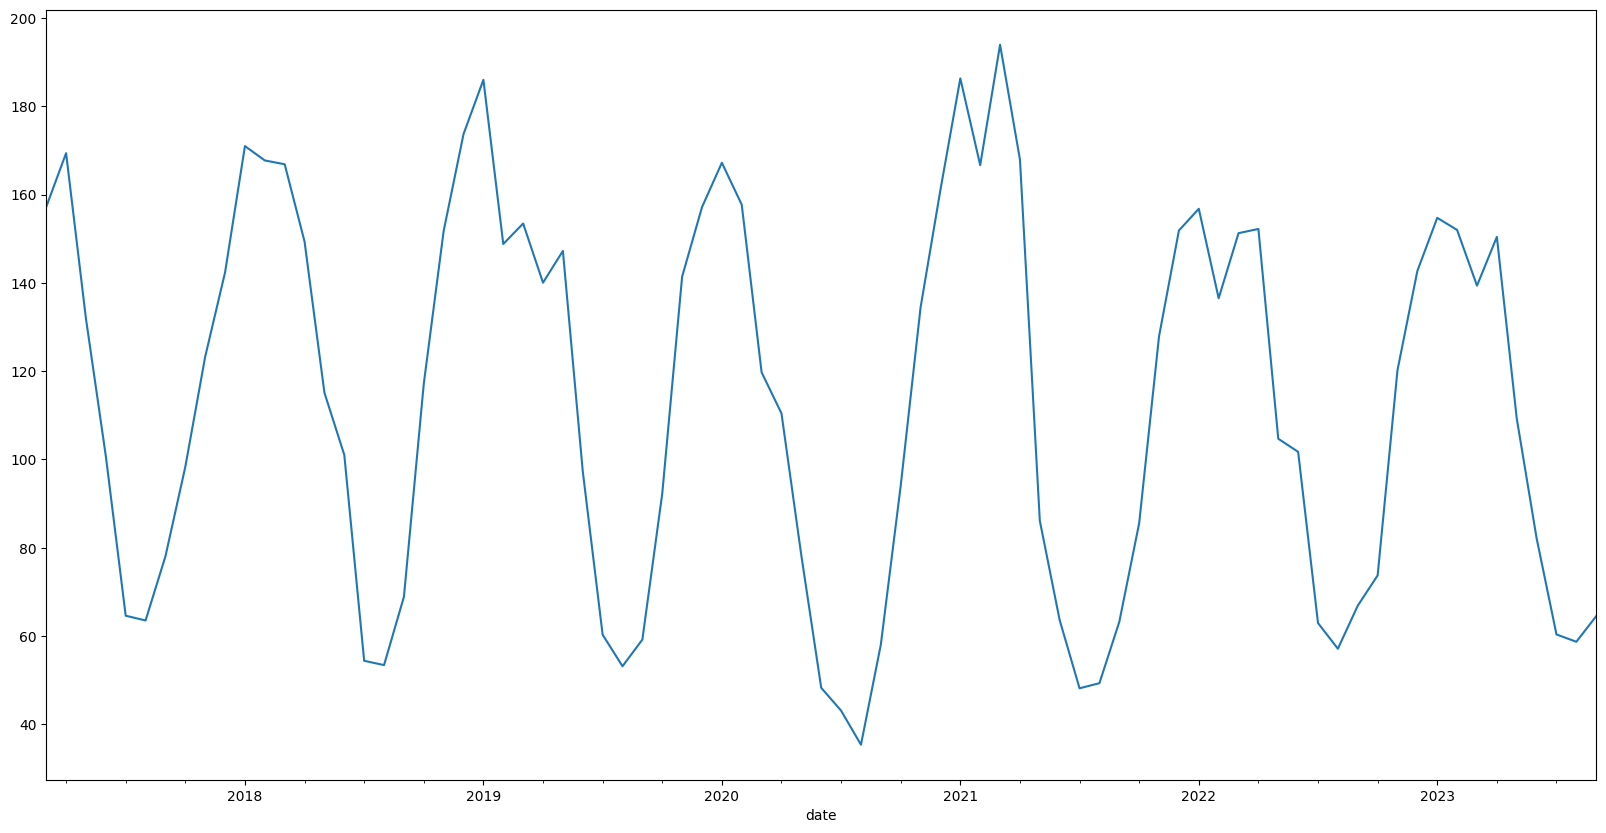

In [ ]:
plt.figure(figsize = (20,10))
ts.plot()
plt.show()

** *italicised text*Doing adfuller test to identify the data set is stationay or not**



In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.800303
p-value: 0.380311


In [ ]:
ts_train = ts[:60]
ts_test = ts[60:]

In [ ]:
ts_train

date
2017-03    157.233867
2017-04    169.405699
2017-05    131.899485
2017-06    100.753989
2017-07     64.601552
2017-08     63.533246
2017-09     78.071141
2017-10     98.354752
2017-11    123.298611
2017-12    142.392473
2018-01    171.006581
2018-02    167.752176
2018-03    166.890246
2018-04    149.369565
2018-05    115.135522
2018-06    101.032808
2018-07     54.392208
2018-08     53.416961
2018-09     68.880166
2018-10    117.158163
2018-11    151.766413
2018-12    173.733871
2019-01    186.025131
2019-02    148.817687
2019-03    153.467121
2019-04    140.056670
2019-05    147.252726
2019-06     97.329914
2019-07     60.311385
2019-08     53.155894
2019-09     59.191026
2019-10     92.272760
2019-11    141.412500
2019-12    157.163320
2020-01    167.237872
2020-02    157.737143
2020-03    119.754415
2020-04    110.441215
2020-05     78.243647
2020-06     48.272168
2020-07     43.103469
2020-08     35.377206
2020-09     58.073469
2020-10     94.061745
2020-11    134.462057
2020-

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
import itertools
from sklearn.metrics import mean_squared_error

In [ ]:
p = range(0,8)
q = range(0,8)
d = range(0,2)

In [ ]:
pqd_combination = list(itertools.product(p,d,q))

In [ ]:
error = []
pqd = []

In [ ]:
for i in pqd_combination:
    A_model = ARIMA(ts_train,order= i).fit()
    predict = A_model.predict(len(ts_train),len(ts)-1)
    e = np.sqrt(mean_squared_error(ts_test,predict))
    pqd.append(i)
    error.append(e)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

In [ ]:
min = error[0]
index = 0
for i in range(1,len(error)-1):
    if(min > error[i]):
        min = error[i]
        index = i

print(error[index],' => ',pqd[index])

17.76953391910416  =>  (6, 0, 3)


In [ ]:
model_ts = ARIMA(ts_train, order=pqd[index])
model_ts_fit = model_ts.fit()
print(model_ts_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                   60
Model:                 ARIMA(6, 0, 3)   Log Likelihood                -248.487
Date:                Thu, 28 Sep 2023   AIC                            518.973
Time:                        07:12:25   BIC                            542.011
Sample:                    03-31-2017   HQIC                           527.985
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.1511      4.286     26.633      0.000     105.751     122.552
ar.L1          1.4026      0.340      4.126      0.000       0.736       2.069
ar.L2         -0.2044      0.789     -0.259      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
arima_predict = model_ts_fit.predict(start = len(ts_train),end = len(ts))

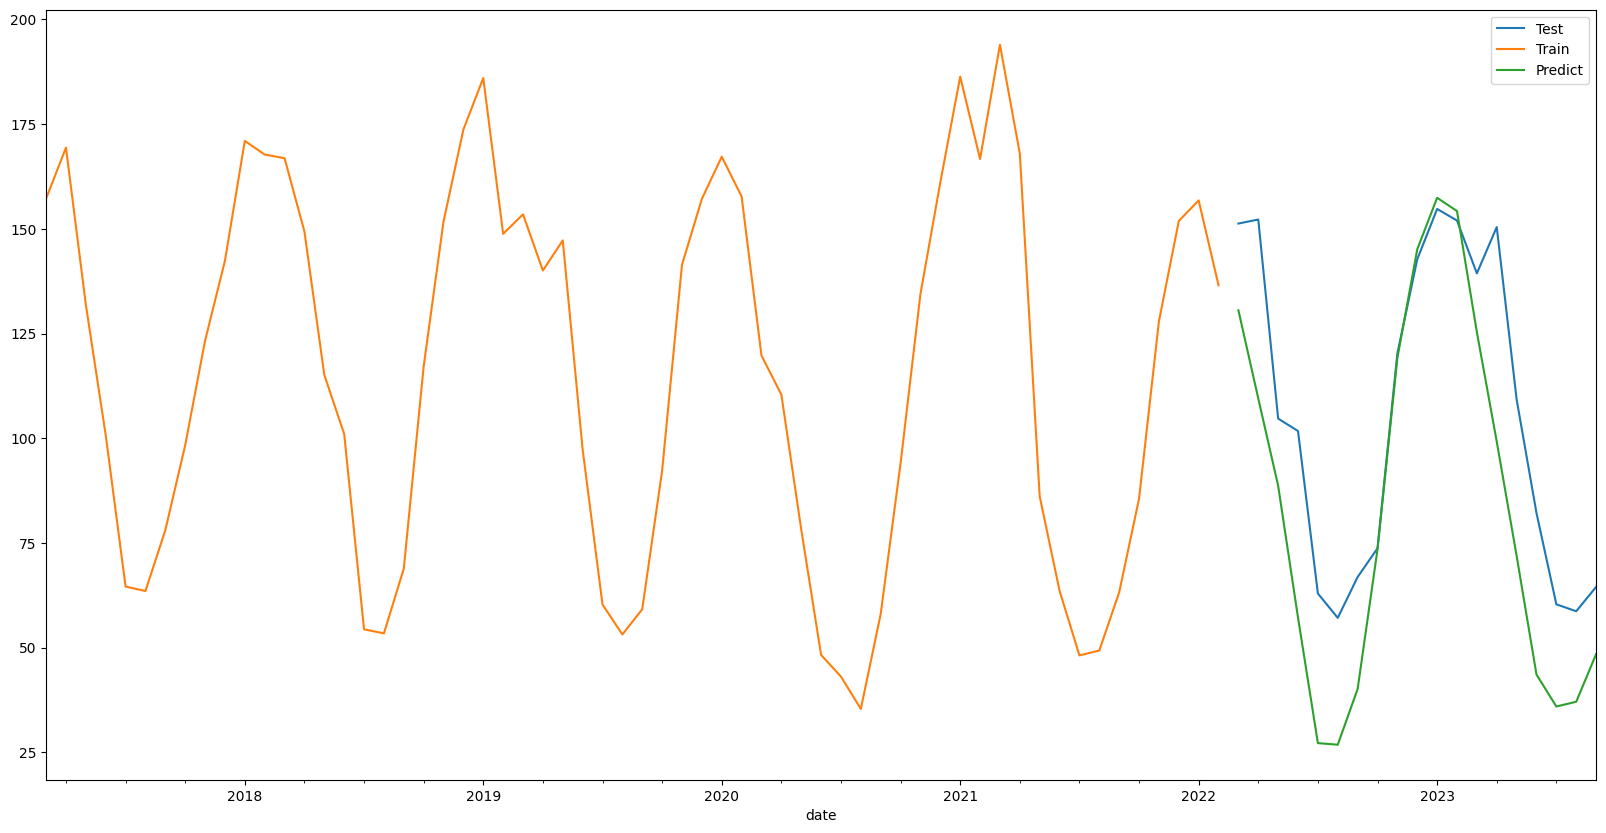

In [ ]:
plt.figure(figsize = (20,10))
ts_test.plot(label = "Test")
ts_train.plot(label = "Train")
predict.plot(label = 'Predict')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score
import numpy as np
mse = mean_squared_error(ts_test, predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ts_test, predict)
r2 = r2_score(ts_test, predict)

print('RMSE: ',rmse)
print('MAE: ',mae)
print('R2 Score: ',r2)

RMSE:  27.576951387300166
MAE:  22.56287348678331
R2 Score:  0.460305019775495


# SARIMA

In [ ]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput )

Results of Dickey-Fuller Test:
Test Statistic                 -1.800303
p-value                         0.380311
#Lags Used                     10.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


In [ ]:
df1_ts = ts - ts.shift(1)

In [ ]:
df1_ts=df1_ts.dropna()

In [ ]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df1_ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput )

Results of Dickey-Fuller Test:
Test Statistic                -8.389128e+00
p-value                        2.393091e-13
#Lags Used                     9.000000e+00
Number of Observations Used    6.800000e+01
Critical Value (1%)           -3.530399e+00
Critical Value (5%)           -2.905087e+00
Critical Value (10%)          -2.590001e+00
dtype: float64


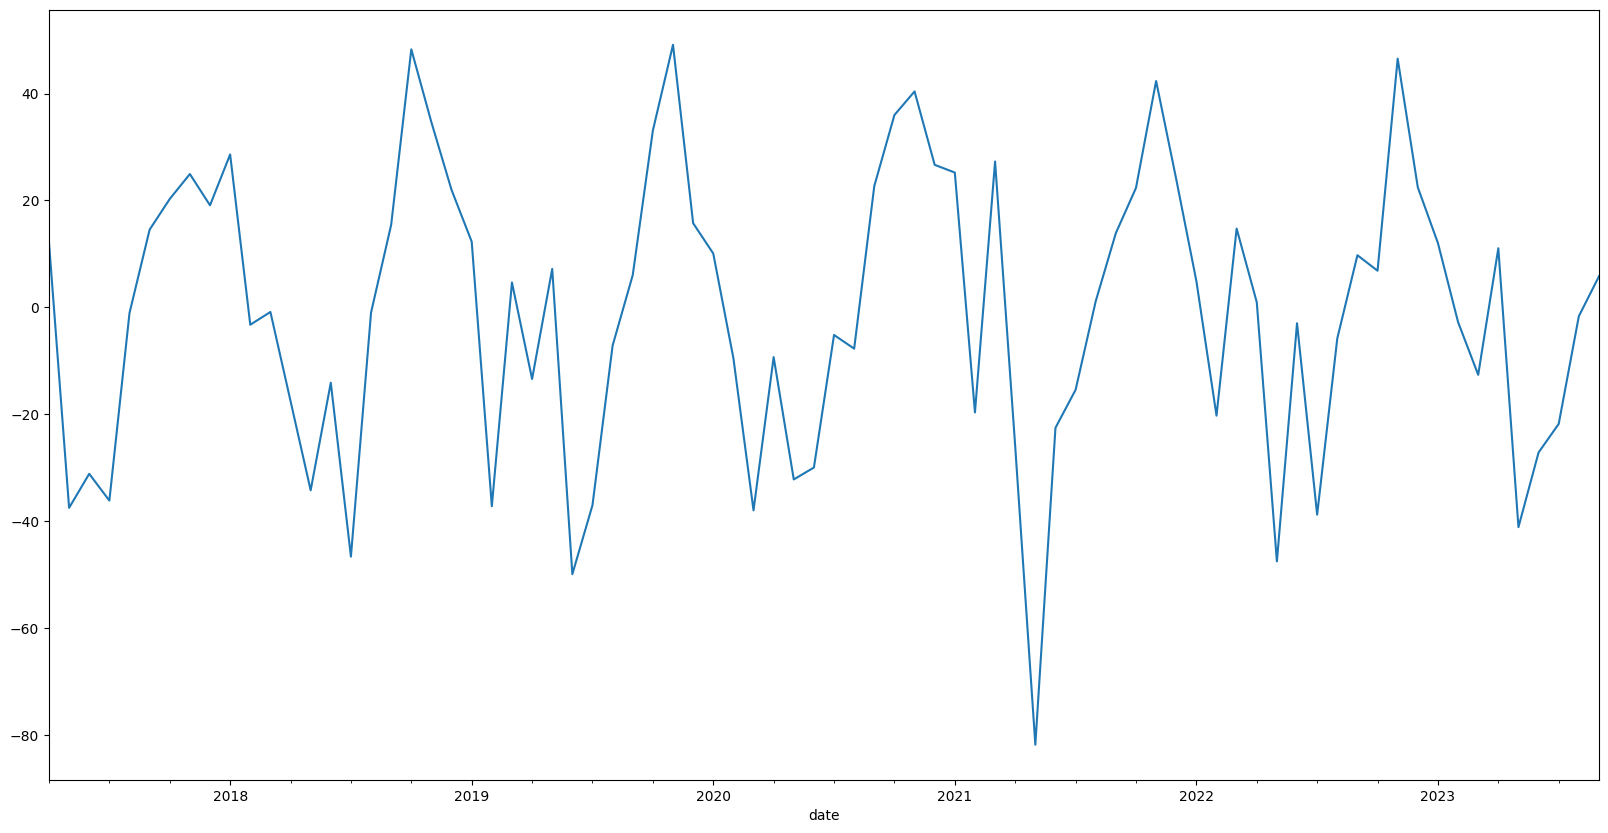

In [ ]:
plt.figure(figsize = (20,10))
df1_ts.plot()
plt.show()

In [ ]:
df1_ts_train = df1_ts[:60]
df1_ts_test = df1_ts[60:]

In [ ]:
df_pdq = []
df_error = []

In [ ]:
for i in pqd_combination:
    A_model = ARIMA(df1_ts_train,order= i).fit()
    predict = A_model.predict(len(df1_ts_train),len(df1_ts)-1)
    e = np.sqrt(mean_squared_error(df1_ts_test,predict))
    df_pdq.append(i)
    df_error.append(e)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

In [ ]:
min = df_error[0]
index = 0
for i in range(1,len(df_error)-1):
    if(min > df_error[i]):
        min = df_error[i]
        index = i

print(df_error[index],' => ',df_pdq[index])

14.653851808743577  =>  (7, 0, 3)


In [ ]:
import statsmodels.api as sm

In [ ]:
sarima_model = sm.tsa.statespace.SARIMAX(df1_ts_train, trend='n', order=(7,0,3), seasonal_order=(1,1,1,12))
s_results = sarima_model.fit()
print(s_results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  AQI   No. Observations:                   60
Model:             SARIMAX(7, 0, 3)x(1, 1, [1], 12)   Log Likelihood                -202.153
Date:                              Thu, 28 Sep 2023   AIC                            430.306
Time:                                      07:13:39   BIC                            454.632
Sample:                                  04-30-2017   HQIC                           439.499
                                       - 03-31-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4404      0.533     -0.827      0.408      -1.485       0.604
ar.L2         -0.23

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
s_pred = s_results.predict(start = len(df1_ts_train),end = len(df1_ts)-1)

In [ ]:
len(df1_ts)-1

77

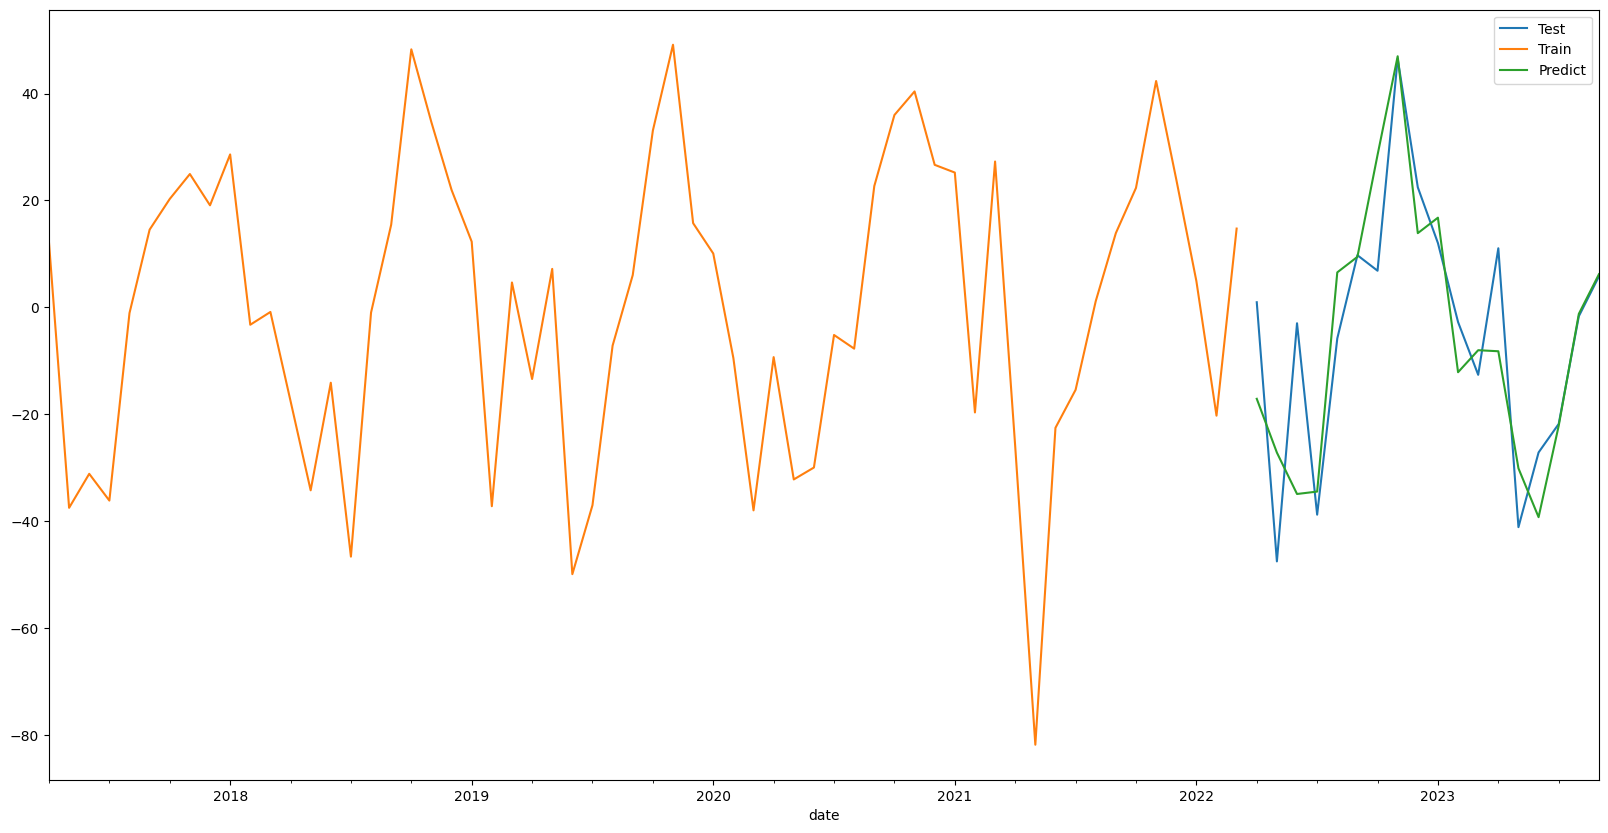

In [ ]:
plt.figure(figsize = (20,10))
df1_ts_test.plot(label = "Test")
df1_ts_train.plot(label = "Train")
s_pred.plot(label = 'Predict')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score
import numpy as np
mse = mean_squared_error(df1_ts_test, s_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df1_ts_test, s_pred)
r2 = r2_score(df1_ts_test, s_pred)

print('RMSE: ',rmse)
print('MAE: ',mae)
print('R2 Score: ',r2)

RMSE:  13.431614752827235
MAE:  10.01917516999895
R2 Score:  0.660848848892861


# LSTM

In [ ]:
lstm_df = df

In [ ]:
lstm_df

,date,pm_cast,pm_aqi_category,pm_raw,pm_qc,o3_cast,o3_aqi_category,o3_raw,o3_qc,temp,...,humidity,wind_speed,wind_deg,wind_gust,rain_1h,clouds_all,weather_main,weather_description,weather_icon,AQI
0,2017-03-01 00:00:00,134.9,Unhealthy,146.0,Valid,4.000000,Good,4.000000,Valid,286.46,...,93,0.00,0,NaN,0.0,20,Mist,mist,50n,192.0
1,2017-03-01 01:00:00,144.5,Unhealthy,154.0,Valid,2.000000,Good,2.000000,Valid,286.64,...,93,1.50,100,NaN,0.0,40,Mist,mist,50d,197.0
2,2017-03-01 02:00:00,134.0,Unhealthy,122.0,Valid,8.000000,Good,8.000000,Valid,288.34,...,87,1.54,80,NaN,0.0,40,Mist,mist,50d,192.0
3,2017-03-01 03:00:00,125.9,Unhealthy,114.0,Valid,6.000000,Good,6.000000,Valid,289.13,...,85,1.03,0,NaN,0.0,20,Mist,mist,50d,187.0
4,2017-03-01 04:00:00,128.0,Unhealthy,131.0,Valid,8.000000,Good,8.000000,Valid,289.91,...,67,1.03,0,NaN,0.0,20,Mist,mist,50d,188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58908,2023-09-10 21:00:00,19.5,Moderate,22.0,Valid,11.780789,NaN,9.024275,NaN,296.42,...,93,0.00,0,NaN,0.0,75,Clouds,broken clouds,04n,67.0
58909,2023-09-10 22:00:00,15.2,Moderate,11.0,Valid,9.430619,NaN,7.452858,NaN,296.28,...,95,0.00,0,NaN,0.0,75,Clouds,broken clouds,04n,58.0
58910,2023-09-10 23:00:00,16.1,Moderate,17.0,Valid,7.821763,NaN,6.571318,NaN,296.03,...,92,1.03,0,NaN,0.0,75,Clouds,broken clouds,04n,59.0
58911,2023-09-11 00:00:00,17.0,Moderate,18.0,Valid,6.480737,NaN,5.490301,NaN,295.94,...,92,1.54,170,NaN,0.0,75,Clouds,broken clouds,04n,61.0


In [ ]:
lstm_df["date"]= pd.to_datetime(lstm_df["date"])

In [ ]:
lstm_df.columns

Index(['date', 'pm_cast', 'pm_aqi_category', 'pm_raw', 'pm_qc', 'o3_cast',
       'o3_aqi_category', 'o3_raw', 'o3_qc', 'temp', 'visibility', 'dew_point',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h', 'clouds_all',
       'weather_main', 'weather_description', 'weather_icon', 'AQI'],
      dtype='object')

In [ ]:
lstm_df = lstm_df[['date', 'pm_raw',
       'o3_raw', 'visibility', 'dew_point',
       'feels_like', 'pressure', 'humidity','rain_1h', 'clouds_all','AQI']]

In [ ]:
lstm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58913 entries, 0 to 58912
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        58913 non-null  datetime64[ns]
 1   pm_raw      58913 non-null  float64       
 2   o3_raw      58913 non-null  float64       
 3   visibility  58913 non-null  float64       
 4   dew_point   58913 non-null  float64       
 5   feels_like  58913 non-null  float64       
 6   pressure    58913 non-null  int64         
 7   humidity    58913 non-null  int64         
 8   rain_1h     58913 non-null  float64       
 9   clouds_all  58913 non-null  int64         
 10  AQI         58913 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 4.9 MB


In [ ]:
dates = lstm_df['date']
lstm_df.drop('date', axis=1,inplace=True)

In [ ]:
dates

0       2017-03-01 00:00:00
1       2017-03-01 01:00:00
2       2017-03-01 02:00:00
3       2017-03-01 03:00:00
4       2017-03-01 04:00:00
                ...        
58908   2023-09-10 21:00:00
58909   2023-09-10 22:00:00
58910   2023-09-10 23:00:00
58911   2023-09-11 00:00:00
58912   2023-09-11 01:00:00
Name: date, Length: 58913, dtype: datetime64[ns]

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

col_names = []
for i in lstm_df.columns:
    col_names.append(i)

lstm_df[col_names] = min_max_scaler.fit_transform(lstm_df[col_names])

In [ ]:
x = lstm_df.drop(columns =['AQI'])
y = lstm_df['AQI']

In [ ]:
x.describe()

,pm_raw,o3_raw,visibility,dew_point,feels_like,pressure,humidity,rain_1h,clouds_all
count,58913.000000,58913.000000,58913.000000,58913.000000,58913.000000,58913.000000,58913.000000,58913.000000,58913.000000
mean,0.051356,0.171965,0.641442,0.668627,0.543891,0.232713,0.762211,0.011456,0.466649
std,0.050475,0.142297,0.183321,0.171927,0.174612,0.050613,0.190557,0.034999,0.263146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.018659,0.047487,0.597990,0.522261,0.412175,0.195876,0.640000,0.000000,0.200000
50%,0.036945,0.133261,0.698492,0.685950,0.586484,0.237113,0.820000,0.000000,0.400000
75%,0.070469,0.266606,0.698492,0.833111,0.666667,0.268041,0.930000,0.007471,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dates = np.array(dates)
dates

array(['2017-03-01T00:00:00.000000000', '2017-03-01T01:00:00.000000000',
       '2017-03-01T02:00:00.000000000', ...,
       '2023-09-10T23:00:00.000000000', '2023-09-11T00:00:00.000000000',
       '2023-09-11T01:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
x = np.array(x)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [ ]:
y = np.array(y)
y = y.reshape(-1,)

In [ ]:
dates_train, x_train, y_train = dates[:45000], x[:45000], y[:45000]
dates_test, x_test, y_test = dates[45000:], x[45000:], y[45000:]

In [ ]:
dates_test

array(['2022-03-02T12:00:00.000000000', '2022-03-02T13:00:00.000000000',
       '2022-03-02T14:00:00.000000000', ...,
       '2023-09-10T23:00:00.000000000', '2023-09-11T00:00:00.000000000',
       '2023-09-11T01:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
x_train.shape

(45000, 9, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import InputLayer

model_lstm = Sequential()

model_lstm.add(InputLayer((9,1)))

model_lstm.add(LSTM(50))

model_lstm.add(Dense(34 ,'relu'))
#model_lstm.add(Dropout(0.25))

model_lstm.add(Dense(15 ,'relu'))

model_lstm.add(Dense(1 ,'relu' ))

In [ ]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_6 (Dense)             (None, 34)                1734      
                                                                 
 dense_7 (Dense)             (None, 15)                525       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 12675 (49.51 KB)
Trainable params: 12675 (49.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_lstm.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['accuracy']
)

In [ ]:
lstm_history = model_lstm.fit(x_train,y_train,validation_split=0.33 , epochs = 10)

Epoch 1/10
943/943 [==============================] - 19s 12ms/step - loss: 0.0040 - accuracy: 6.6337e-05 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 2/10
943/943 [==============================] - 8s 9ms/step - loss: 0.0027 - accuracy: 6.6337e-05 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 3/10
943/943 [==============================] - 9s 9ms/step - loss: 0.0025 - accuracy: 6.6337e-05 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 4/10
943/943 [==============================] - 9s 10ms/step - loss: 0.0022 - accuracy: 6.6337e-05 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 5/10
943/943 [==============================] - 9s 10ms/step - loss: 0.0017 - accuracy: 6.6337e-05 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 6/10
943/943 [==============================] - 9s 9ms/step - loss: 0.0013 - accuracy: 6.6337e-05 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 7/10
943/943 [==============================] - 9s 10ms/step - loss: 0.0011 - accuracy: 6.

In [ ]:
lstm_y_pred = model_lstm.predict(x_test)

435/435 [==============================] - 2s 3ms/step


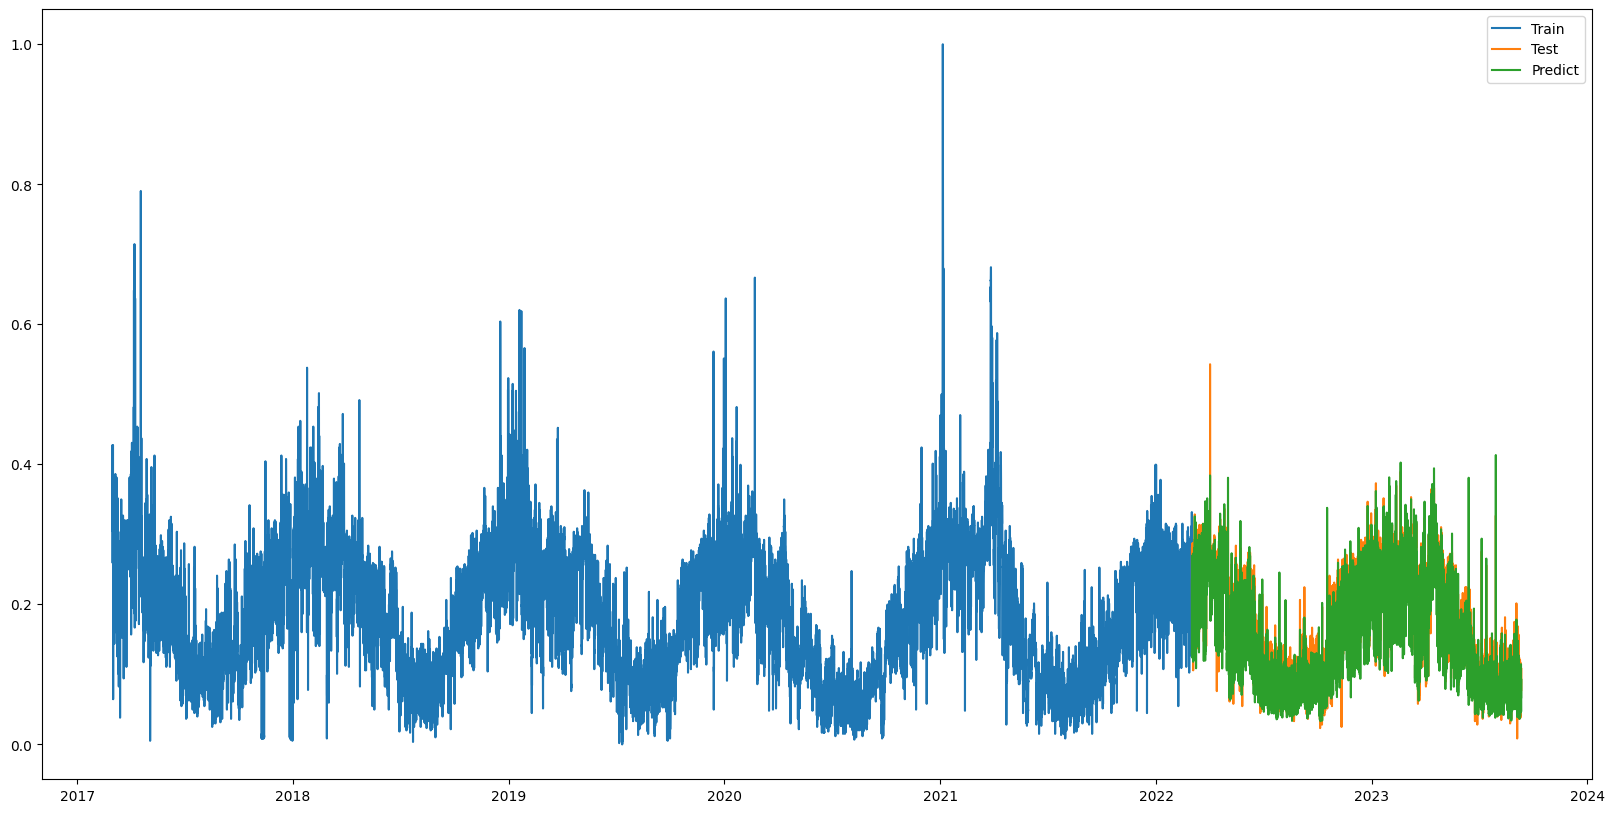

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(dates_train,y_train,label = "Train")
plt.plot(dates_test,y_test,label = "Test")
plt.plot(dates_test,lstm_y_pred,label = 'Predict')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, lstm_y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, lstm_y_pred)
r2 = r2_score(y_test, lstm_y_pred)

print('RMSE: ',rmse)
print('MAE: ',mae)
print('R2 Score: ',r2)

RMSE:  0.026187256994144106
MAE:  0.021218105379521162
R2 Score:  0.8785620778640284


# GRU

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout
from keras.layers import InputLayer

model_gru = Sequential()

model_gru.add(InputLayer((9,1)))

model_gru.add(GRU(50))

model_gru.add(Dense(26 ,'relu'))
# model_lstm.add(Dropout(0.25))

model_gru.add(Dense(10 ,'relu'))

model_gru.add(Dense(1 ))

In [ ]:
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                7950      
                                                                 
 dense_3 (Dense)             (None, 26)                1326      
                                                                 
 dense_4 (Dense)             (None, 10)                270       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9557 (37.33 KB)
Trainable params: 9557 (37.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_gru.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['accuracy']
)

In [ ]:
gru_history = model_gru.fit(x_train,y_train,validation_split=0.33 , epochs = 10)

Epoch 1/10
943/943 [==============================] - 13s 11ms/step - loss: 0.0045 - accuracy: 6.6337e-05 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 2/10
943/943 [==============================] - 9s 10ms/step - loss: 0.0029 - accuracy: 6.6337e-05 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 3/10
943/943 [==============================] - 9s 9ms/step - loss: 0.0026 - accuracy: 6.6337e-05 - val_loss: 0.0021 - val_accuracy: 6.7336e-05
Epoch 4/10
943/943 [==============================] - 10s 10ms/step - loss: 0.0019 - accuracy: 6.6337e-05 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 5/10
943/943 [==============================] - 11s 11ms/step - loss: 0.0013 - accuracy: 6.6337e-05 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 6/10
943/943 [==============================] - 9s 9ms/step - loss: 0.0010 - accuracy: 6.6337e-05 - val_loss: 8.4659e-04 - val_accuracy: 0.0000e+00
Epoch 7/10
943/943 [==============================] - 9s 10ms/step - loss: 0.0010 - accur

In [ ]:
model_gru.evaluate(x_test, y_test)

435/435 [==============================] - 2s 4ms/step - loss: 3.2509e-04 - accuracy: 0.0000e+00


[0.00032509068842045963, 0.0]

In [ ]:
gru_y_pred = model_gru.predict(x_test)

435/435 [==============================] - 1s 2ms/step


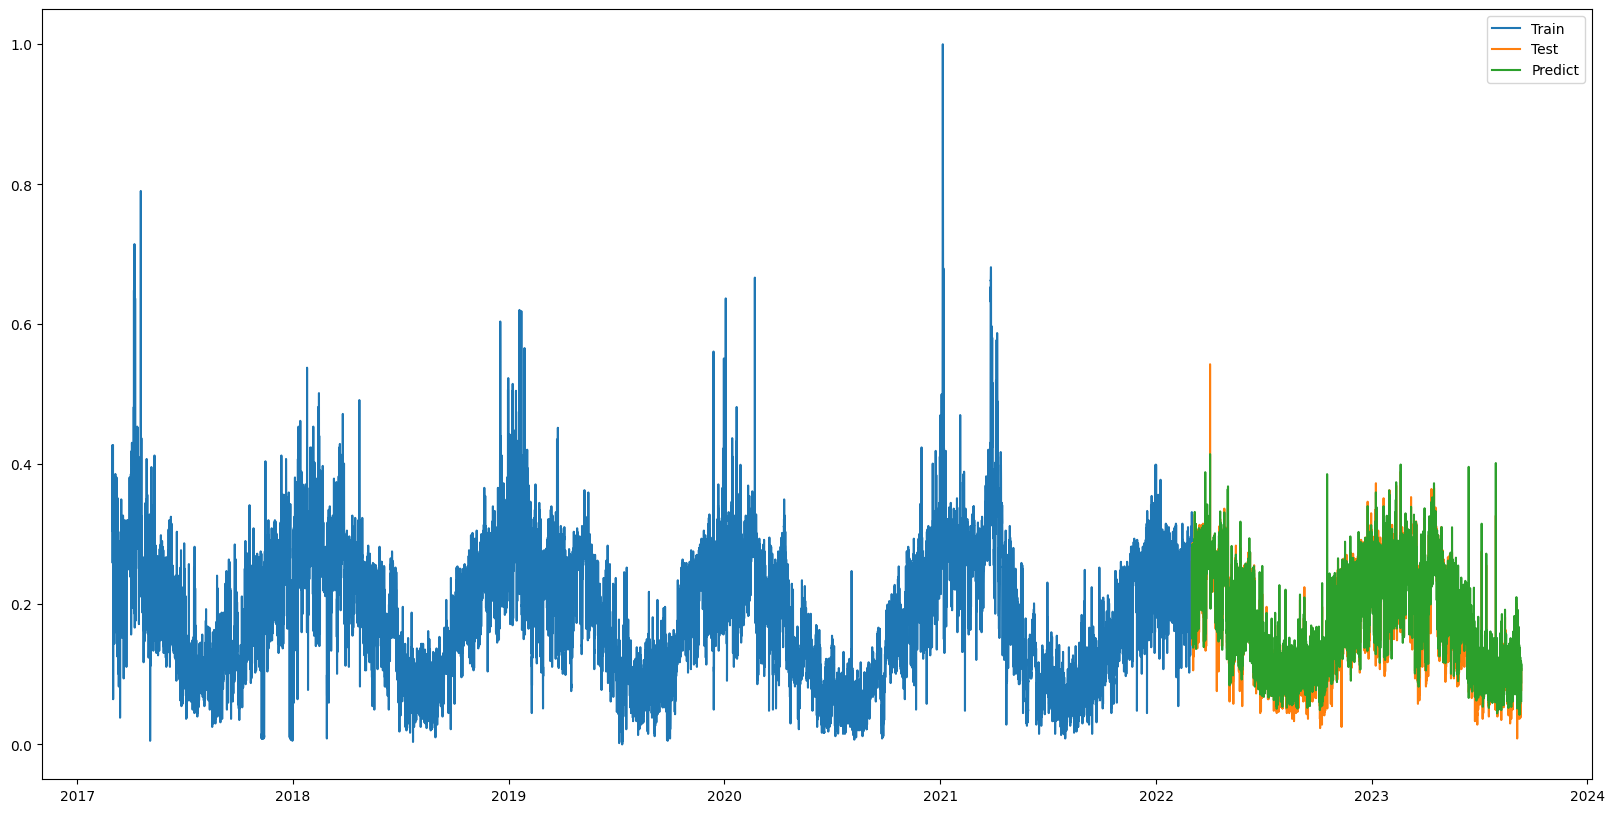

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(dates_train,y_train,label = "Train")
plt.plot(dates_test,y_test,label = "Test")
plt.plot(dates_test,gru_y_pred,label = 'Predict')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, gru_y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, gru_y_pred)
r2 = r2_score(y_test, gru_y_pred)

print('RMSE: ',rmse)
print('MAE: ',mae)
print('R2 Score: ',r2)

RMSE:  0.0180302707058796
MAE:  0.013115941435980508
R2 Score:  0.9424323101898399
